# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s - loss: 14.4459 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======================

50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14

50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss

50000/50000 [==============================] - 2s - loss: 1.5591 - acc: 0.4518 - val_loss: 1.6572 - val_acc: 0.4287
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 1.5478 - acc: 0.4551 - val_loss: 1.7222 - val_acc: 0.3944
Epoch 15/50
50000/50000 [==============================] - 2s - loss: 1.5313 - acc: 0.4600 - val_loss: 1.5814 - val_acc: 0.4364
Epoch 16/50
50000/50000 [==============================] - 3s - loss: 1.5196 - acc: 0.4649 - val_loss: 1.5851 - val_acc: 0.4333
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 1.5040 - acc: 0.4710 - val_loss: 1.5472 - val_acc: 0.4448
Epoch 18/50
50000/50000 [==============================] - 2s - loss: 1.4943 - acc: 0.4737 - val_loss: 1.5213 - val_acc: 0.4509
Epoch 19/50
50000/50000 [==============================] - 2s - loss: 1.4808 - acc: 0.4770 - val_loss: 1.6249 - val_acc: 0.4268
Epoch 20/50
50000/50000 [==============================] - 2s - loss: 1.4646 - acc: 0.4837 - val_loss: 1.5376 - val_

50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss

50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss

50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss

50000/50000 [==============================] - 2s - loss: 1.7726 - acc: 0.3825 - val_loss: 1.7729 - val_acc: 0.3789
Epoch 32/50
50000/50000 [==============================] - 1s - loss: 1.7676 - acc: 0.3848 - val_loss: 1.7673 - val_acc: 0.3831
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.7628 - acc: 0.3854 - val_loss: 1.7626 - val_acc: 0.3864
Epoch 34/50
50000/50000 [==============================] - 1s - loss: 1.7580 - acc: 0.3881 - val_loss: 1.7584 - val_acc: 0.3869
Epoch 35/50
50000/50000 [==============================] - 1s - loss: 1.7535 - acc: 0.3904 - val_loss: 1.7532 - val_acc: 0.3890
Epoch 36/50
50000/50000 [==============================] - 2s - loss: 1.7489 - acc: 0.3909 - val_loss: 1.7496 - val_acc: 0.3911
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 1.7445 - acc: 0.3934 - val_loss: 1.7450 - val_acc: 0.3963
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 1.7401 - acc: 0.3956 - val_loss: 1.7399 - val_

50000/50000 [==============================] - 2s - loss: 0.9522 - acc: 0.6577 - val_loss: 1.5684 - val_acc: 0.5021
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 0.9384 - acc: 0.6635 - val_loss: 1.7653 - val_acc: 0.4941
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 0.9203 - acc: 0.6701 - val_loss: 1.8987 - val_acc: 0.4615
Epoch 39/50
50000/50000 [==============================] - 2s - loss: 0.9135 - acc: 0.6742 - val_loss: 1.7845 - val_acc: 0.4825
Epoch 40/50
50000/50000 [==============================] - 1s - loss: 0.8957 - acc: 0.6782 - val_loss: 1.8175 - val_acc: 0.4827
Epoch 41/50
50000/50000 [==============================] - 2s - loss: 0.8806 - acc: 0.6850 - val_loss: 1.7350 - val_acc: 0.4845
Epoch 42/50
50000/50000 [==============================] - 2s - loss: 0.8657 - acc: 0.6901 - val_loss: 1.9753 - val_acc: 0.4437
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 0.8552 - acc: 0.6917 - val_loss: 1.8786 - val_

50000/50000 [==============================] - 1s - loss: 1.2981 - acc: 0.5477 - val_loss: 1.4003 - val_acc: 0.5003
Epoch 42/50
50000/50000 [==============================] - 1s - loss: 1.2922 - acc: 0.5496 - val_loss: 1.4039 - val_acc: 0.4984
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 1.2892 - acc: 0.5503 - val_loss: 1.3844 - val_acc: 0.5098
Epoch 44/50
50000/50000 [==============================] - 2s - loss: 1.2840 - acc: 0.5525 - val_loss: 1.4095 - val_acc: 0.5006
Epoch 45/50
50000/50000 [==============================] - 1s - loss: 1.2792 - acc: 0.5555 - val_loss: 1.3850 - val_acc: 0.5064
Epoch 46/50
50000/50000 [==============================] - 2s - loss: 1.2754 - acc: 0.5569 - val_loss: 1.3820 - val_acc: 0.5119
Epoch 47/50
50000/50000 [==============================] - 2s - loss: 1.2716 - acc: 0.5569 - val_loss: 1.3921 - val_acc: 0.5040
Epoch 48/50
50000/50000 [==============================] - 1s - loss: 1.2676 - acc: 0.5591 - val_loss: 1.3793 - val_

50000/50000 [==============================] - 2s - loss: 0.6754 - acc: 0.7591 - val_loss: 1.6933 - val_acc: 0.5211
Epoch 47/50
50000/50000 [==============================] - 2s - loss: 0.6619 - acc: 0.7650 - val_loss: 1.7832 - val_acc: 0.5139
Epoch 48/50
50000/50000 [==============================] - 2s - loss: 0.6592 - acc: 0.7651 - val_loss: 1.7489 - val_acc: 0.5140
Epoch 49/50
50000/50000 [==============================] - 2s - loss: 0.6527 - acc: 0.7698 - val_loss: 1.7971 - val_acc: 0.5125
Epoch 50/50
50000/50000 [==============================] - 2s - loss: 0.6396 - acc: 0.7724 - val_loss: 1.8182 - val_acc: 0.5145
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s - loss: 1.9584 - acc: 0.2949 - val_loss: 1.9144 - val_acc: 0.2961
Epoch 2/50
50000/50000 [==============================] - 2s - loss: 1.7806 - acc: 0.3702 - val_loss: 1.8202 - val_acc: 0.3394
Epoch 3/50
50000/50000 [==============================] - 2s - loss: 1.7027 - acc: 0.3951 - val_loss: 1.8861 - val_acc: 0.3234
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 1.6478 - acc: 0.4176 - val_loss: 1.6861 - val_acc: 0.3983
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 1.6067 - acc: 0.4327 - val_loss: 1.6162 - val_acc: 0.4191
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 1.5668 - acc: 0.4461 - val_loss: 1.6017 - val_acc: 0.4408
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.5391 - acc: 0.4556 - val_loss: 1.6374 - val_acc: 0.4320
Epoch 8/50
50000/50000 [==============================] - 2s 

50000/50000 [==============================] - 2s - loss: 1.8442 - acc: 0.3624 - val_loss: 1.8348 - val_acc: 0.3659
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 1.8283 - acc: 0.3663 - val_loss: 1.8212 - val_acc: 0.3693
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.8148 - acc: 0.3718 - val_loss: 1.8099 - val_acc: 0.3766
Epoch 8/50
50000/50000 [==============================] - 1s - loss: 1.8034 - acc: 0.3742 - val_loss: 1.7984 - val_acc: 0.3789
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 1.7935 - acc: 0.3785 - val_loss: 1.7898 - val_acc: 0.3819
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 1.7845 - acc: 0.3828 - val_loss: 1.7813 - val_acc: 0.3849
Epoch 11/50
50000/50000 [==============================] - 1s - loss: 1.7763 - acc: 0.3846 - val_loss: 1.7748 - val_acc: 0.3874
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 1.7690 - acc: 0.3877 - val_loss: 1.7666 - val_acc:

50000/50000 [==============================] - 2s - loss: 1.3910 - acc: 0.5108 - val_loss: 1.4484 - val_acc: 0.4848
Epoch 11/50
50000/50000 [==============================] - 2s - loss: 1.3702 - acc: 0.5170 - val_loss: 1.4305 - val_acc: 0.4945
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 1.3415 - acc: 0.5289 - val_loss: 1.4210 - val_acc: 0.4988
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.3198 - acc: 0.5352 - val_loss: 1.4081 - val_acc: 0.5037
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 1.3080 - acc: 0.5405 - val_loss: 1.3847 - val_acc: 0.5082
Epoch 15/50
50000/50000 [==============================] - 2s - loss: 1.2828 - acc: 0.5487 - val_loss: 1.3779 - val_acc: 0.5110
Epoch 16/50
50000/50000 [==============================] - 2s - loss: 1.2685 - acc: 0.5542 - val_loss: 1.3672 - val_acc: 0.5164
Epoch 17/50
50000/50000 [==============================] - 1s - loss: 1.2457 - acc: 0.5625 - val_loss: 1.3690 - val_

50000/50000 [==============================] - 1s - loss: 2.2977 - acc: 0.1185 - val_loss: 2.2982 - val_acc: 0.1154
Epoch 16/50
50000/50000 [==============================] - 2s - loss: 2.2954 - acc: 0.1199 - val_loss: 2.2960 - val_acc: 0.1167
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 2.2933 - acc: 0.1218 - val_loss: 2.2939 - val_acc: 0.1187
Epoch 18/50
50000/50000 [==============================] - 2s - loss: 2.2913 - acc: 0.1230 - val_loss: 2.2919 - val_acc: 0.1192
Epoch 19/50
50000/50000 [==============================] - 1s - loss: 2.2894 - acc: 0.1254 - val_loss: 2.2901 - val_acc: 0.1207
Epoch 20/50
50000/50000 [==============================] - 2s - loss: 2.2876 - acc: 0.1268 - val_loss: 2.2883 - val_acc: 0.1224
Epoch 21/50
50000/50000 [==============================] - 1s - loss: 2.2859 - acc: 0.1282 - val_loss: 2.2866 - val_acc: 0.1245
Epoch 22/50
50000/50000 [==============================] - 1s - loss: 2.2842 - acc: 0.1295 - val_loss: 2.2850 - val_

50000/50000 [==============================] - 2s - loss: 1.5780 - acc: 0.4529 - val_loss: 1.5934 - val_acc: 0.4459
Epoch 21/50
50000/50000 [==============================] - 2s - loss: 1.5699 - acc: 0.4565 - val_loss: 1.5862 - val_acc: 0.4424
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 1.5613 - acc: 0.4600 - val_loss: 1.5809 - val_acc: 0.4437
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 1.5535 - acc: 0.4618 - val_loss: 1.5679 - val_acc: 0.4551
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 1.5457 - acc: 0.4642 - val_loss: 1.5756 - val_acc: 0.4433
Epoch 25/50
50000/50000 [==============================] - 2s - loss: 1.5388 - acc: 0.4665 - val_loss: 1.5600 - val_acc: 0.4557
Epoch 26/50
50000/50000 [==============================] - 2s - loss: 1.5321 - acc: 0.4696 - val_loss: 1.5552 - val_acc: 0.4541
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 1.5245 - acc: 0.4707 - val_loss: 1.5548 - val_

50000/50000 [==============================] - 1s - loss: 2.0611 - acc: 0.2835 - val_loss: 2.0614 - val_acc: 0.2809
Epoch 26/50
50000/50000 [==============================] - 1s - loss: 2.0580 - acc: 0.2848 - val_loss: 2.0584 - val_acc: 0.2826
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 2.0549 - acc: 0.2859 - val_loss: 2.0554 - val_acc: 0.2828
Epoch 28/50
50000/50000 [==============================] - 1s - loss: 2.0519 - acc: 0.2872 - val_loss: 2.0525 - val_acc: 0.2847
Epoch 29/50
50000/50000 [==============================] - 1s - loss: 2.0490 - acc: 0.2882 - val_loss: 2.0497 - val_acc: 0.2851
Epoch 30/50
50000/50000 [==============================] - 1s - loss: 2.0462 - acc: 0.2895 - val_loss: 2.0470 - val_acc: 0.2868
Epoch 31/50
50000/50000 [==============================] - 1s - loss: 2.0435 - acc: 0.2904 - val_loss: 2.0444 - val_acc: 0.2883
Epoch 32/50
50000/50000 [==============================] - 1s - loss: 2.0409 - acc: 0.2922 - val_loss: 2.0418 - val_

50000/50000 [==============================] - 2s - loss: 1.4734 - acc: 0.4867 - val_loss: 1.5075 - val_acc: 0.4716
Epoch 31/50
50000/50000 [==============================] - 2s - loss: 1.4662 - acc: 0.4907 - val_loss: 1.5038 - val_acc: 0.4745
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 1.4589 - acc: 0.4946 - val_loss: 1.4967 - val_acc: 0.4764
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.4532 - acc: 0.4954 - val_loss: 1.4926 - val_acc: 0.4759
Epoch 34/50
50000/50000 [==============================] - 2s - loss: 1.4472 - acc: 0.4994 - val_loss: 1.4881 - val_acc: 0.4774
Epoch 35/50
50000/50000 [==============================] - 2s - loss: 1.4419 - acc: 0.4993 - val_loss: 1.4917 - val_acc: 0.4730
Epoch 36/50
50000/50000 [==============================] - 2s - loss: 1.4367 - acc: 0.5011 - val_loss: 1.4843 - val_acc: 0.4760
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 1.4306 - acc: 0.5035 - val_loss: 1.4781 - val_

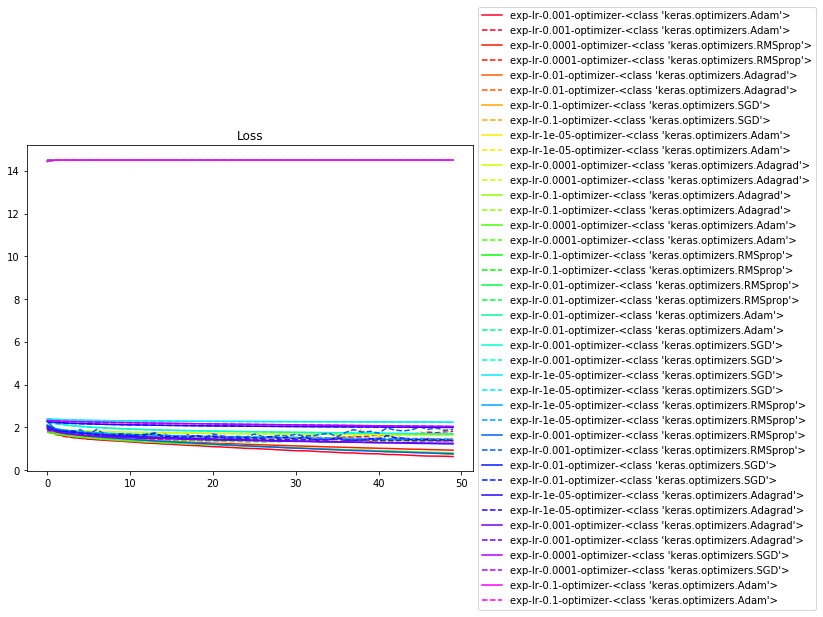

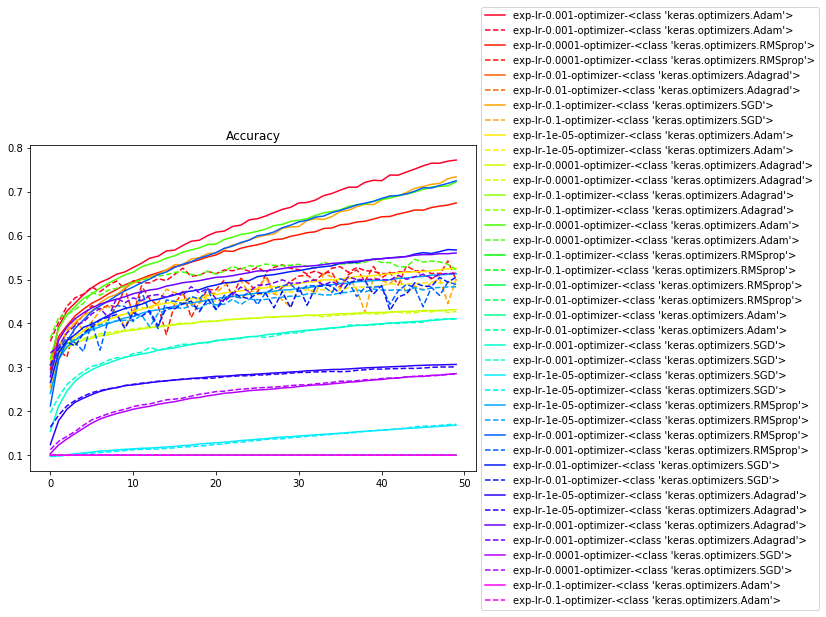

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()